# Measures for inter-rater reliability

## Cohen's Kappa

You can use either sklearn.metrics or nltk.agreement to compute kappa. We will see examples using both of these packages.

In [1]:
from sklearn.metrics import cohen_kappa_score

coder1 = [1,0,2,0,1,1,2,0,1,1]
coder2 = [1,1,0,0,1,1,2,1,1,0]
score = cohen_kappa_score(coder1,coder2)

print('Cohen\'s Kappa:',score)

Cohen's Kappa: 0.3220338983050848


In order to use nltk.agreement package, we need to structure our coding data into a format of [coder, instance, code]. For instance, the first code in coder1 is 1 which will be formatted as [1,1,1] which means coder1 assigned 1 to the first instance.

Let’s convert our codes given in the above example in the format of [coder,instance,code]. Here we have two options to do that. I have included the first option for better understanding. Second option is a short one line solution to our problem.

In [2]:
coder1 = [1,0,2,0,1,1,2,0,1,1]

coder1_new = []
coder2_new = []
for i in range(len(coder1)):
    coder1_new.append([1,i,coder1[i]])
    coder2_new.append([2,i,coder2[i]])


formatted_codes = coder1_new + coder2_new
print(formatted_codes)

[[1, 0, 1], [1, 1, 0], [1, 2, 2], [1, 3, 0], [1, 4, 1], [1, 5, 1], [1, 6, 2], [1, 7, 0], [1, 8, 1], [1, 9, 1], [2, 0, 1], [2, 1, 1], [2, 2, 0], [2, 3, 0], [2, 4, 1], [2, 5, 1], [2, 6, 2], [2, 7, 1], [2, 8, 1], [2, 9, 0]]


In [3]:
formatted_codes = [[1,i,coder1[i]] for i in range(len(coder1))] + [[2,i,coder2[i]] for i in range(len(coder2))] 
print(formatted_codes)

[[1, 0, 1], [1, 1, 0], [1, 2, 2], [1, 3, 0], [1, 4, 1], [1, 5, 1], [1, 6, 2], [1, 7, 0], [1, 8, 1], [1, 9, 1], [2, 0, 1], [2, 1, 1], [2, 2, 0], [2, 3, 0], [2, 4, 1], [2, 5, 1], [2, 6, 2], [2, 7, 1], [2, 8, 1], [2, 9, 0]]


Now, we have our codes in the required format, we can compute cohen’s kappa using nltk.agreement.

In [4]:
from nltk import agreement

ratingtask = agreement.AnnotationTask(data=formatted_codes)

print('Cohen\'s Kappa:',ratingtask.kappa())

Cohen's Kappa: 0.32203389830508466


## Cohen’s Kappa using CSV files
In this section, we will see how to compute cohen’s kappa from codes stored in CSV files. So let’s say we have two files (coder1.csv, coder2.csv). Each of these files has some columns representing a dimension. Below is the snapshot of such a file.

The files contain 10 columns each representing a dimension coded by first coder. We have a similar file for coder2 and now we want to calculate Cohen’s kappa for each of such dimensions.

In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score


coder1 = pd.read_csv('coder1.csv')
coder2 = pd.read_csv('coder2.csv')


dimensions = coder1.columns

#iterate for each dimension
for dim in dimensions:
   
    dim_codes1 = coder1[dim]
    
   
    dim_codes2 = coder2[dim]
    print('Dimension:',dim)
    

    score = cohen_kappa_score(dim_codes1,dim_codes2)
    
    print(' ',score)

## Fleiss’s Kappa
As per my understanding, Cohen’s Kappa can be used if you have codes from only two coders. In case, if you have codes from multiple coders then you need to use Fleiss’s kappa.

We will use nltk.agreement package for calculating Fleiss’s Kappa. So now we add one more coder’s data to our previous example.


In [6]:
from nltk import agreement

coder1 = [1,0,2,0,1,1,2,0,1,1]
coder2 = [1,1,0,0,1,1,2,1,1,0]
coder3 = [1,2,2,1,2,1,2,1,1,0]

formatted_codes = [[1,i,coder1[i]] for i in range(len(coder1))] + [[2,i,coder2[i]] for i in range(len(coder2))]  + [[3,i,coder3[i]] for i in range(len(coder3))]


ratingtask = agreement.AnnotationTask(data=formatted_codes)

print('Fleiss\'s Kappa:',ratingtask.multi_kappa())

Fleiss's Kappa: 0.3010752688172044


## Fleiss’s Kappa using CSV files
Now, let’s say we have three CSV files, one from each coder. Each coder assigned codes on ten dimensions (as shown in the above example of CSV file). The following code compute Fleiss’s kappa among three coders for each dimension.

In [ ]:
import pandas as pd
from nltk import agreement


coder1 = pd.read_csv('coder1.csv')
coder2 = pd.read_csv('coder2.csv')
coder3 = pd.read_csv('coder3.csv')

dimensions = coder1.columns


for dim in dimensions:
   
    dim_codes1 = coder1[dim]
    dim_codes2 = coder2[dim]
    dim_codes3 = coder3[dim]
    
    formatted_codes = [[1,i,dim_codes1[i]] for i in range(len(dim_codes1))] + [[2,i,dim_codes2[i]] for i in range(len(dim_codes2))]  + [[3,i,dim_codes3[i]] for i in range(len(dim_codes3))]
    
    ratingtask = agreement.AnnotationTask(data=formatted_codes)
    print('Dimension:')
    print(' Fleiss\'s Kappa:',ratingtask.multi_kappa())

## Cronbach’s Alpha
Cronbach’s alpha is mostly used to measure the internal consistency of a survey or questionnaire. For this measure, I am using Pingouin package (link).

Let’s say we have data from a questionnaire (which has questions with Likert scale) in a CSV file. For example, I am using a dataset from Pingouin with some missing values.

In [8]:
!pip install pingouin
import pingouin as pg

data = pg.read_dataset('cronbach_wide_missing')

data.head()

     |████████████████████████████████| 225kB 4.9MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221688 sha256=fa7bb8da387e75708af26980cca641206a0cf8b154dba983e5f093f3cb8b71cc
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=1af03924cb11f0dbb433e2be3806199282e6ad8d19db5e330f19abb45cbea4d3
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=2f6cec6f01a316aa769abad5ea637bb97973d1fd7f81f4e317e5d1e71a4cebe0
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,1.0,1,1.0,1,1.0,1,1,1,1.0,1,1
1,1.0,1,1.0,1,1.0,1,1,1,0.0,1,0
2,NaN,0,1.0,1,NaN,1,1,1,1.0,0,0
3,1.0,1,1.0,0,1.0,1,0,1,1.0,0,0
4,1.0,1,1.0,1,1.0,0,0,0,1.0,0,0


In [9]:
pg.cronbach_alpha(data=data)

(0.732660835214447, array([0.435, 0.909]))

## Krippendorff’s Alpha & Scott’s Pi
We can use nltk.agreement python package for both of these measures. I will show you an example of that.

For nltk.agreement, we need our formatted data (what we did in the previous example?). Once we have our formatted data, we simply need to call alpha function to get the Krippendorff’s Alpha. Let’s see the python code.

In [10]:
from nltk import agreement

coder1 = [1,0,2,0,1,1,2,0,1,1]
coder2 = [1,1,0,0,1,1,2,1,1,0]
coder3 = [1,2,2,1,2,1,2,1,1,0]

formatted_codes = [[1,i,coder1[i]] for i in range(len(coder1))] + [[2,i,coder2[i]] for i in range(len(coder2))]  + [[3,i,coder3[i]] for i in range(len(coder3))]


ratingtask = agreement.AnnotationTask(data=formatted_codes)

print('Krippendorff\'s alpha:',ratingtask.alpha())
print('Scott\'s pi:',ratingtask.pi())

Krippendorff's alpha: 0.30952380952380953
Scott's pi: 0.2857142857142859


## Inter-class correlation
I am using Pingouin package mentioned before as well. The function used is intraclass_corr. This function returns a Pandas Datafame having the following information (from R package psych documentation). Six cases are returned (ICC1, ICC2, ICC3, ICC1k, ICCk2, ICCk3) by the function and the following are the meaning for each case.

Shrout and Fleiss (1979) consider six cases of reliability of ratings done by k raters on n targets.

ICC1: Each target is rated by a different judge and the judges are selected at random. (This is a one-way ANOVA fixed effects model and is found by (MSB- MSW)/(MSB+ (nr-1)*MSW))

ICC2: A random sample of k judges rate each target. The measure is one of absolute agreement in the ratings. Found as (MSB- MSE)/(MSB + (nr-1)*MSE + nr*(MSJ-MSE)/nc)

ICC3: A fixed set of k judges rate each target. There is no generalization to a larger population of judges. (MSB – MSE)/(MSB+ (nr-1)*MSE)

Then, for each of these cases, is reliability to be estimated for a single rating or for the average of k ratings? (The 1 rating case is equivalent to the average intercorrelation, the k rating case to the Spearman Brown adjusted reliability.)

ICC1 is sensitive to differences in means between raters and is a measure of absolute agreement.

ICC2 and ICC3 remove mean differences between judges, but are sensitive to interactions of raters by judges. The difference between ICC2 and ICC3 is whether raters are seen as fixed or random effects.

ICC1k, ICC2k, ICC3K reflect the means of k raters.

The dataset from Pingouin has been used in the following example.

In [11]:
import pingouin as pg

data = pg.read_dataset('icc')

icc = pg.intraclass_corr(data=data, targets='Wine', raters='Judge',ratings='Scores')
icc

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.727521,11.680026,7,24,0.000002,"[0.43, 0.93]"
1,ICC2,Single random raters,0.727689,11.786693,7,21,0.000005,"[0.43, 0.93]"
2,ICC3,Single fixed raters,0.729487,11.786693,7,21,0.000005,"[0.43, 0.93]"
3,ICC1k,Average raters absolute,0.914384,11.680026,7,24,0.000002,"[0.75, 0.98]"
4,ICC2k,Average random raters,0.914450,11.786693,7,21,0.000005,"[0.75, 0.98]"
5,ICC3k,Average fixed raters,0.915159,11.786693,7,21,0.000005,"[0.75, 0.98]"


## Bland-Altman Plot

Bland-Altman plots [1] are extensively used to evaluate the agreement among two different instruments or two measurements techniques. They allow identification of any systematic difference between the measurements (i.e., fixed bias) or possible outliers.

The mean difference is the estimated bias, and the SD of the differences measures the random fluctuations around this mean. If the mean value of the difference differs significantly from 0 on the basis of a 1-sample t-test, this indicates the presence of fixed bias. If there is a consistent bias, it can be adjusted for by subtracting the mean difference from the new method.

It is common to compute 95% limits of agreement for each comparison (average difference ± 1.96 standard deviation of the difference), which tells us how far apart measurements by 2 methods were more likely to be for most individuals. If the differences within mean ± 1.96 SD are not clinically important, the two methods may be used interchangeably. The 95% limits of agreement can be unreliable estimates of the population parameters especially for small sample sizes so, when comparing methods or assessing repeatability, it is important to calculate confidence intervals for 95% limits of agreement.

The code is an adaptation of the PyCompare package. The present implementation is a simplified version; please refer to the original package for more advanced functionalities.

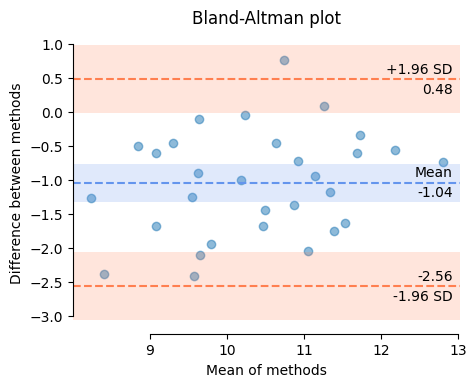

In [12]:
import numpy as np
import pingouin as pg
np.random.seed(123)
mean, cov = [10, 11], [[1, 0.8], [0.8, 1]]
x, y = np.random.multivariate_normal(mean, cov, 30).T
ax = pg.plot_blandaltman(x, y)